In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pystan
import scipy
import math

from pylab import plot,show,hist,figure,title

In [3]:
df = pd.read_excel("/Users/ishanichakraborty/Google Drive/userVisits.xlsx")
df.head()

,user_id,total_visits,weeklyVisits,Interval_visits_int
0,1332384,70,"0,0,0,1,2,1,1,0,0,2,1,0,0,2,1,0,0,0,1,1,2,1,0,...","[3, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 1, 4, 2, ..."
1,1332636,4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","[62, 12, 1, 28]"
2,1334543,4,"1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","[6, 0]"
3,1336195,1,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",[113]
4,1339702,16,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...","[110, 14, 29, 7, 29, 2, 2, 1, 0, 2, 4, 1, 1, 1..."


In [4]:
#df = df.iloc[df.index <= 200]

In [5]:
df = df.loc[df.total_visits > 70]

In [6]:
visits = df['weeklyVisits'].tolist()

In [7]:
visits_int = list(list((int(a)* int(a)* int(a)) for a in (str(r).split(',')))for r in visits)

In [8]:
len(visits_int)

210

In [9]:
len(visits_int[10])

113

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 62., 40., 43.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

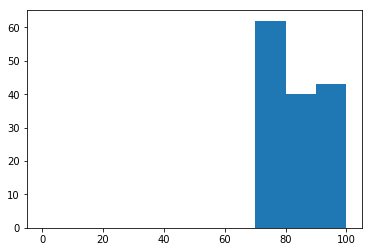

In [10]:
hist(df['total_visits'], range =[0,100])

In [13]:
visitsLDA_code = """
data {
    int<lower=0> J;// number of users
    int<lower=0> G;// number of groups
    int<lower=0> W;// number of weeks
    int<lower=0> V;// number of different values in weekly visit sequence, aka : maximum number of weekly 
                    //visits in all sequences, vocabulary of the sequences
    int y[J,W]; // estimated number of visits next week, every entry in the visit sequence
    int<lower=1,upper=G> z[J,W,G]; // group(number) allocation for every entry in every user-visit sequence 
}
parameters {

    
    matrix[G,J] theta;
    matrix[V,G] shi;
    
}
transformed parameters {
     
     vector[G] alpha;
     vector[V] beta;
     
     real<lower=0,upper=1> filler;
     
     for (g in 1:G){
     alpha[g]=filler;
     }
     
     for (v in 1:V){
     beta[v]=filler;
     }
     
     
     
     

}
model {
    //filler ~ beta(2,2);
   for(j in 1:J){ 
   theta[,j] ~ dirichlet(alpha);
   }
   for(g in 1:G){
   shi[,g] ~ dirichlet(beta);
   } 
  
    for (j in 1:J)
    for(w in 1:W){
    z[j,w,] ~ multinomial(theta[,j]);
    y[w,] ~ multinomial(shi[,z[j,w,]]);
    
 }
}
"""



visitsLDA_dat = {'J': len(visits_int),
              'W':113,
              'G':5,
              'z':[1,0],  
              'V':7,
              'y': visits_int
               }



sm = pystan.StanModel(model_code=visitsLDA_code)
fit = sm.sampling(data=visitsLDA_dat, iter=1000, chains=4)

ValueError: Failed to parse Stan model 'anon_model_871ba60a008726367d13ad4de3566759'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

No matches for: 

  int[] ~ multinomial(matrix)

Available argument signatures for multinomial:

  int[] ~ multinomial(vector)

require real scalar return type for probability function.
  error in 'unknown file name' at line 50, column 38
  -------------------------------------------------
    48:     for(w in 1:W){
    49:     z[j,w,] ~ multinomial(theta[,j]);
    50:     y[w] ~ multinomial(shi[,z[j,w]]);
                                             ^
    51:     
  -------------------------------------------------



In [ ]:
fit


In [ ]:
fit.